In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [29]:
claims = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Food%20Claims/claims.csv')

In [30]:
claims.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,"R$50,000.00",34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,"R$180,000.00",56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,"R$70,000.00",12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,"R$95,104.00",29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,"R$29,000.00",12610.50,FORTALEZA,1,False,meat


In [31]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim ID              98 non-null     object 
 1   Time to Close         98 non-null     int64  
 2   Claim Amount          98 non-null     object 
 3   Amount Paid           98 non-null     float64
 4   Location              98 non-null     object 
 5   Individuals on Claim  98 non-null     int64  
 6   Linked Cases          98 non-null     bool   
 7   Cause                 20 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 5.6+ KB


In [32]:
claims.duplicated().sum()

0

In [33]:
claims.describe()

,Time to Close,Amount Paid,Individuals on Claim
count,98.000000,98.000000,98.000000
mean,832.346939,58448.238571,4.908163
std,686.851131,87525.873849,7.292259
min,-57.000000,999.680000,0.000000
25%,340.750000,15965.642500,1.000000
50%,638.500000,29451.040000,2.000000
75%,1138.750000,52114.760000,5.750000
max,3591.000000,558725.770000,41.000000


In [34]:
claims[claims['Time to Close'] <= 0]

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
58,0000000-00.2019.0.00.0079,-57,"R$3,672.00",999.68,SAO LUIS,0,False,NaN


In [35]:
claims.columns = claims.columns.str.replace(' ', '_')

In [36]:
claims["Year_of_Claim"] = claims.Claim_ID.str[11:15]

In [37]:
claims["Claim_ID"] = claims.Claim_ID[-4:]

In [38]:
claims["Claim_Amount"] = claims.Claim_Amount.str[2:-3].str.replace(',', '')

In [39]:
claims['Claim_Amount'] = claims['Claim_Amount'].astype('int64')

In [40]:
claims["Cause"].fillna('Unknown', inplace=True)

In [41]:
claims["Time_to_Close"] = claims.Time_to_Close.astype("str").str.replace('', '').astype("int64")

In [42]:
years = []

def append_value(days):
    years.append(days)

for day in claims['Time_to_Close']:
    if day <= 365:
        append_value('Within a Year')
    elif day <= 730:
        append_value('Within 2 Years')
    elif day <= 1095:
        append_value('Within 3 Years')
    elif day <= 1460:
        append_value('Within 4 Years')
    elif day <= 1825:
        append_value('Within 5 Years')
    else:
        append_value('6 Years and above')

In [43]:
claims["Year_to_Close"] = years

In [44]:
claims.head()

,Claim_ID,Time_to_Close,Claim_Amount,Amount_Paid,Location,Individuals_on_Claim,Linked_Cases,Cause,Year_of_Claim,Year_to_Close
0,NaN,2082,50000,34297.47,RECIFE,2,False,Unknown,2010,6 Years and above
1,NaN,3591,180000,56383.54,SAO LUIS,7,False,Unknown,2011,6 Years and above
2,NaN,2997,70000,12366.76,SAO LUIS,3,False,vegetables,2012,6 Years and above
3,NaN,1143,95104,29217.16,FORTALEZA,4,False,Unknown,2013,Within 4 Years
4,NaN,117,29000,12610.50,FORTALEZA,1,False,meat,2014,Within a Year


In [45]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim_ID              4 non-null      object 
 1   Time_to_Close         98 non-null     int64  
 2   Claim_Amount          98 non-null     int64  
 3   Amount_Paid           98 non-null     float64
 4   Location              98 non-null     object 
 5   Individuals_on_Claim  98 non-null     int64  
 6   Linked_Cases          98 non-null     bool   
 7   Cause                 98 non-null     object 
 8   Year_of_Claim         98 non-null     object 
 9   Year_to_Close         98 non-null     object 
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 7.1+ KB


In [46]:
claims.describe()

,Time_to_Close,Claim_Amount,Amount_Paid,Individuals_on_Claim
count,98.000000,98.000000,98.000000,98.000000
mean,832.346939,122952.030612,58448.238571,4.908163
std,686.851131,166433.389040,87525.873849,7.292259
min,-57.000000,3555.000000,999.680000,0.000000
25%,340.750000,40000.000000,15965.642500,1.000000
50%,638.500000,58454.500000,29451.040000,2.000000
75%,1138.750000,136573.250000,52114.760000,5.750000
max,3591.000000,936540.000000,558725.770000,41.000000


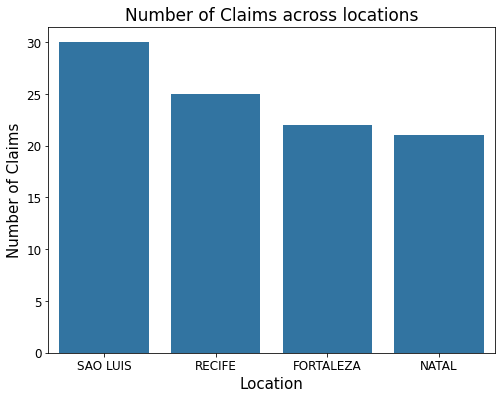

In [47]:
color = sns.color_palette()[0]
order = claims['Location'].value_counts().index

plt.figure(figsize = [8, 6])
ax = sns.countplot(data = claims, x ='Location', color = color, order = order);

plt.xticks(fontsize = 12)
plt.xlabel('Location', size = 15)
plt.yticks(fontsize = 12)
plt.ylabel('Number of Claims', size = 15)
plt.title('Number of Claims across locations', size = 17);

In [48]:
avg_close_time = claims.groupby('Location')['Time_to_Close'].agg([np.mean]).reset_index().sort_values('mean', ascending = False)
avg_close_time

,Location,mean
3,SAO LUIS,1026.266667
2,RECIFE,860.680000
0,FORTALEZA,775.500000
1,NATAL,581.142857


In [49]:
avg_close_time["mean"] = avg_close_time["mean"].apply(np.round).astype(int)
avg_close_time

,Location,mean
3,SAO LUIS,1026
2,RECIFE,861
0,FORTALEZA,776
1,NATAL,581


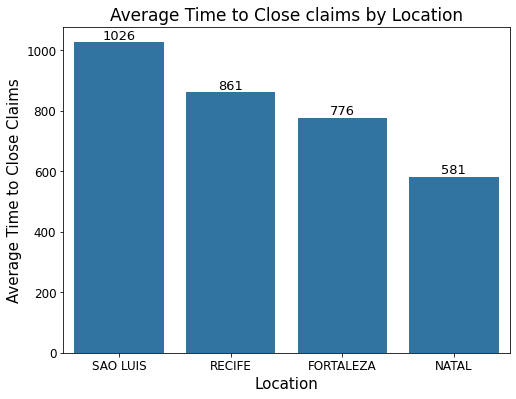

In [50]:
plt.figure(figsize = [8, 6])
ax = sns.barplot(data = avg_close_time, x = "Location", y = "mean", color = color)

plt.xticks(fontsize = 12)
plt.xlabel('Location', size = 15)
plt.yticks(fontsize = 12)
plt.ylabel('Average Time to Close Claims', size = 15)
plt.title('Average Time to Close claims by Location', size = 17);

for container in ax.containers:
    ax.bar_label(container, size = 13)

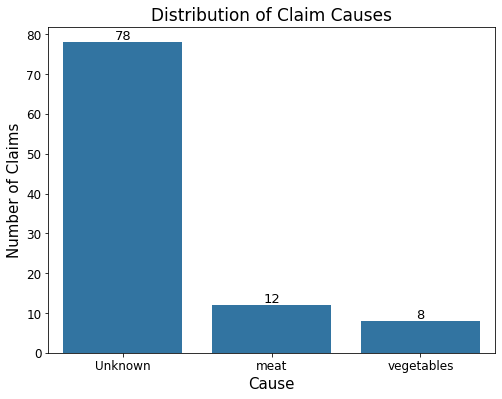

In [51]:
order = claims['Cause'].value_counts().index

# Plotting the chart t answer the above Question
plt.figure(figsize = [8, 6])
ax = sns.countplot(data = claims, x ='Cause', color = color, order = order)

# Format the plot's visual
plt.xticks(fontsize = 12)
plt.xlabel('Cause', size = 15)
plt.yticks(fontsize = 12)
plt.ylabel('Number of Claims', size = 15)
plt.title('Distribution of Claim Causes', size = 17)

# displaying the bar labels using bar_label() function.
for container in ax.containers:
    ax.bar_label(container, size = 13);

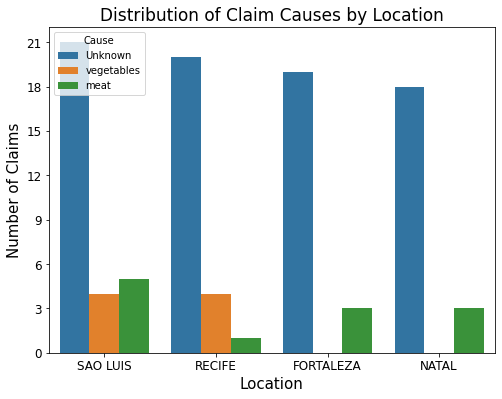

In [58]:
from matplotlib.ticker import MaxNLocator
order = claims['Location'].value_counts().index
plt.figure(figsize = [8, 6])
ax = sns.countplot(data = claims, x ='Location', hue = 'Cause', order = order)
plt.xticks(fontsize = 12)
plt.xlabel('Location', size = 15)
plt.yticks(fontsize = 12)
plt.ylabel('Number of Claims', size = 15)
plt.title('Distribution of Claim Causes by Location', size = 17)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

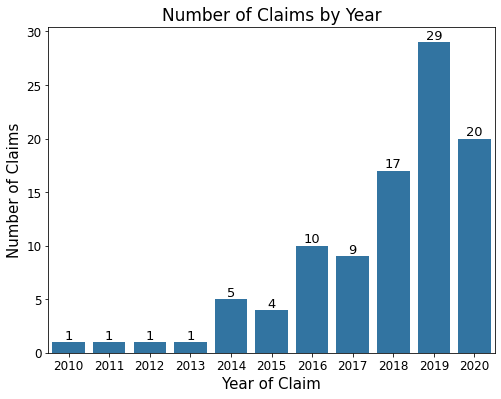

In [61]:
plt.figure(figsize = [8, 6])
ax = sns.countplot(data = claims, x ='Year_of_Claim', color = color)
plt.xticks(fontsize = 12)
plt.xlabel('Year of Claim', size = 15)
plt.yticks(fontsize = 12)
plt.ylabel('Number of Claims', size = 15)
plt.title('Number of Claims by Year', size = 17)

# displaying the bar labels using bar_label() function.
for container in ax.containers:
    ax.bar_label(container, size = 13);